# Sprint 10 - Integrated Project 2

## Introduction

Today, I will be preparing a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry. 

The goal of the model will be to predict the amount of gold recovered from gold ore. They have provided data on extraction and purification. 

The model will help to optimize the production and eliminate unprofitable parameters. 

I will: 

1. Prepare the data
2. Perform data analysis
3. Develop and train a model

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import scipy.stats as st
from sklearn.dummy import DummyRegressor

## Metric Calculation Functions

In [2]:
def calculate_recovery(df, C, F, T):
    recovery = 100 * ((df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T])))
    return recovery

## Preparing Data

### Loading data

In [3]:
try:
    recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')

except:
    print('Data could not be loaded')

### Exploration

In [4]:
recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [7]:
recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [8]:
recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [9]:
recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


*Initial thoughts:*
* There is null data here that needs to be dealt with
* Data types are all good, except for date. I can turn that into a datetime field, in case it's necessary

In [10]:
recovery_train['date'] = pd.to_datetime(recovery_train['date'], format='%Y-%m-%d %H:%M:%S')
recovery_test['date'] = pd.to_datetime(recovery_test['date'], format='%Y-%m-%d %H:%M:%S')
recovery_full['date'] = pd.to_datetime(recovery_full['date'], format='%Y-%m-%d %H:%M:%S')

In [11]:
print(recovery_train['date'].dtypes)
print(recovery_test['date'].dtypes)
print(recovery_full['date'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [12]:
# looking at full sizes of the dataframes before dealing with nulls
print(recovery_train.shape)
print(recovery_test.shape)
print(recovery_full.shape)

(16860, 87)
(5856, 53)
(22716, 87)


In [13]:
# removing null rows
recovery_train = recovery_train.dropna()
recovery_test = recovery_test.dropna()
recovery_full = recovery_full.dropna()

In [14]:
# looking at full sizes of the dataframes before dealing with nulls
print(recovery_train.shape)
print(recovery_test.shape)
print(recovery_full.shape)

(11017, 87)
(5383, 53)
(16094, 87)


In [15]:
# calculating the amount of rows in each dataframe that have a null value in any column
print(recovery_train.isnull().any(axis=1).sum())
print(recovery_test.isnull().any(axis=1).sum())
print(recovery_full.isnull().any(axis=1).sum())

0
0
0


Even though dropping all rows that contain a null results in a reduction of roughly **34.6%** of our training dataset, we are still left with over 11,000 rows for training our model. That may end up being better than figuring out a solution to filling null values that doesn't significantly affect our model. 

Now that nulls are dealt with, let's calculate the recovery rate utilizing the test data, and compare it to the recovery data provided -- just to make sure the data makes sense.

In [16]:
# passing the recovery_train dataframe to the calculate_recovery function

calculated_recovery = calculate_recovery(recovery_train, 'rougher.output.concentrate_au', 'rougher.input.feed_au',
                                        'rougher.output.tail_au')
actual_recovery = recovery_train['rougher.output.recovery']

print(f'The MAE of the calculated recovery vs the actual values is: {mean_absolute_error(actual_recovery, calculated_recovery)}')

The MAE of the calculated recovery vs the actual values is: 9.460144184559453e-15


Great! The provided recovery numbers look to be correct, that is a *very* small MAE score. 

There are multiple columns missing from the test dataset that are present in the training dataset. I want to get an idea of what data is missing and if it makes sense.

In [17]:
column_diff = recovery_train.loc[:, ~recovery_train.columns.isin(recovery_test.columns)]

print(column_diff.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                                11017 non-null  float64


Okay, it makes sense. The missing columns are all outputs (or ratio calculations of outputs.) I wouldn't expect those to be in a dataset we are going to use to train a model to predict said outputs. 

## Data Analysis

### Noting how metal concentration changes as it moves through the purification process

In order to study how each type of metal concentration changes throughout the purification process, I will explore it both with histograms and boxplots, so I can figure out what the distributions of each metal look like. 

In [18]:
# creating new dataframes for each step of the process

input_ag = recovery_full['rougher.input.feed_ag']
input_pb = recovery_full['rougher.input.feed_pb']
input_sol = recovery_full['rougher.input.feed_sol']
input_au = recovery_full['rougher.input.feed_au']

output_ag = recovery_full['rougher.output.concentrate_ag']
output_pb = recovery_full['rougher.output.concentrate_pb']
output_sol = recovery_full['rougher.output.concentrate_sol']
output_au = recovery_full['rougher.output.concentrate_au']

final_ag = recovery_full['final.output.concentrate_ag']
final_pb = recovery_full['final.output.concentrate_pb']
final_sol = recovery_full['final.output.concentrate_sol']
final_au = recovery_full['final.output.concentrate_au']

input_conc = pd.concat([input_ag, input_pb, input_sol, input_au], axis=1)
output_conc = pd.concat([output_ag, output_pb, output_sol, output_au], axis=1)
final_conc = pd.concat([final_ag, final_pb, final_sol, final_au], axis=1)

display(input_conc.head(2))
display(output_conc.head(2))
display(final_conc.head(2))

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_au
0,6.100378,2.284912,36.808594,6.486150
1,6.161113,2.266033,35.753385,6.478583


,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au
0,11.500771,7.101074,28.029297,19.793808
1,11.615865,7.278807,28.067063,20.050975


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au
0,6.055403,9.889648,5.507324,42.192020
1,6.029369,9.968944,5.257781,42.701629


In [19]:
ag_conc = pd.concat([input_ag, output_ag, final_ag], axis=1)
pb_conc = pd.concat([input_pb, output_pb, final_pb], axis=1)
au_conc = pd.concat([input_au, output_au, final_au], axis=1)

#### Silver

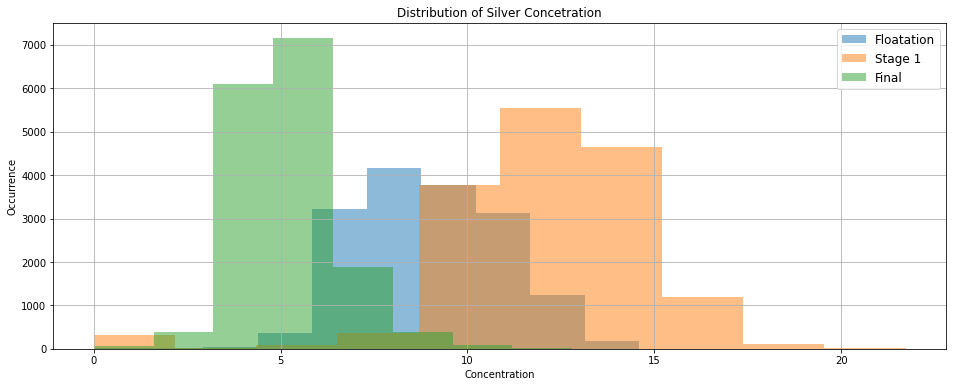

In [20]:
# plotting a histogram of silver concentration

ag_conc['rougher.input.feed_ag'].hist(figsize=(16, 6),
                                             alpha=0.5,
                                             label='Floatation')
ag_conc['rougher.output.concentrate_ag'].hist(alpha=0.5,
                                             label='Stage 1')
ag_conc['final.output.concentrate_ag'].hist(alpha=0.5,
                                             label='Final')

plt.legend(fontsize='large')
plt.title('Distribution of Silver Concetration')
plt.xlabel('Concentration')
plt.ylabel('Occurrence')
plt.show()

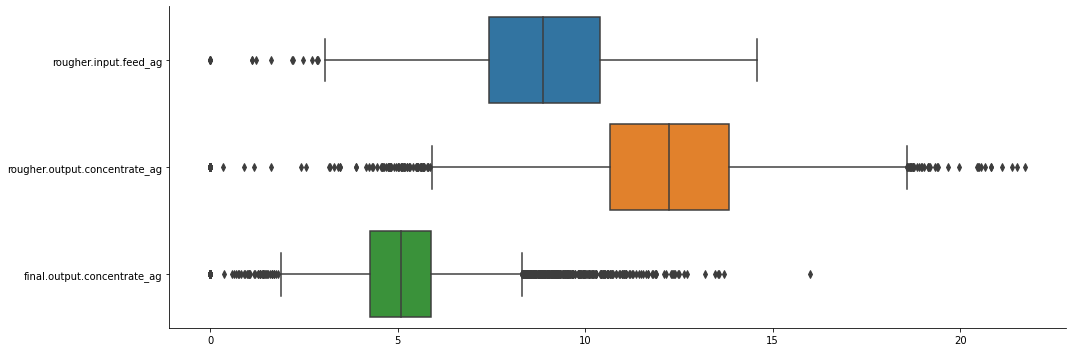

In [21]:
# box and whisker plots for distributions of silver

sns.catplot(kind='box',
            data=ag_conc,
            orient='h',
            height=5,
            aspect=3
           )

plt.show()

Interestingly, the concentration of silver increases at first, and then decreases once purification is finished. 

#### Lead

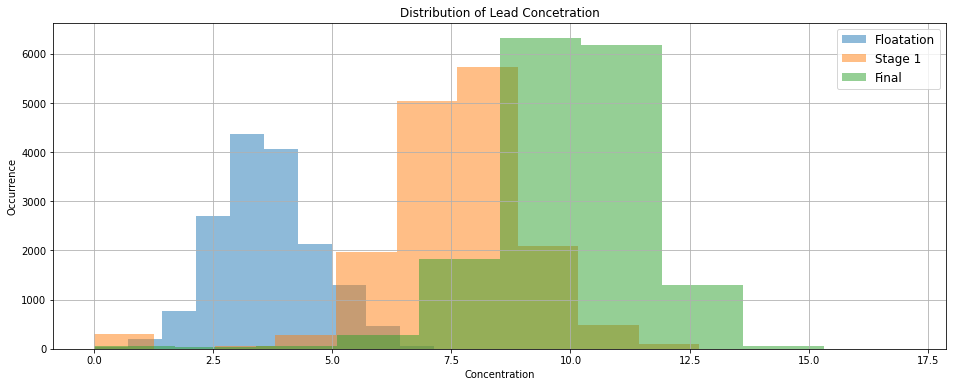

In [22]:
# plotting a histogram of lead concentration

pb_conc['rougher.input.feed_pb'].hist(figsize=(16, 6),
                                             alpha=0.5,
                                             label='Floatation')
pb_conc['rougher.output.concentrate_pb'].hist(alpha=0.5,
                                             label='Stage 1')
pb_conc['final.output.concentrate_pb'].hist(alpha=0.5,
                                             label='Final')

plt.legend(fontsize='large')
plt.title('Distribution of Lead Concetration')
plt.xlabel('Concentration')
plt.ylabel('Occurrence')
plt.show()

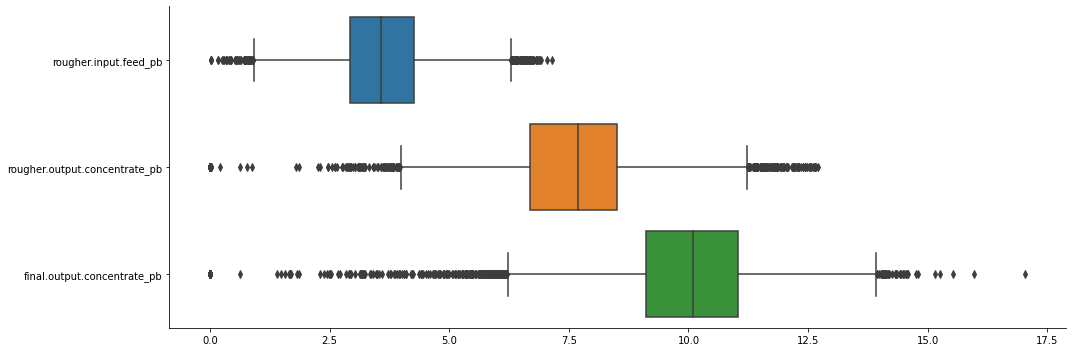

In [23]:
# box and whisker plots for distributions of lead

sns.catplot(kind='box',
            data=pb_conc,
            orient='h',
            height=5,
            aspect=3
           )

plt.show()

It seems the concentration of lead increases throughout the purification process. 

#### Gold

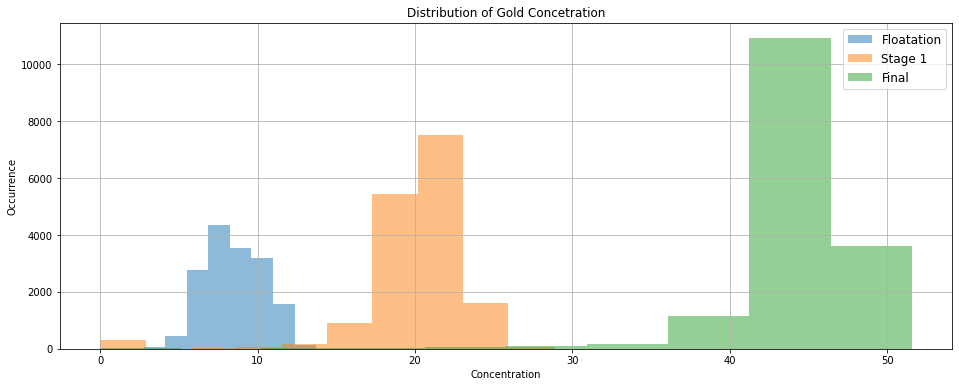

In [24]:
# plotting a histogram of gold concentration

au_conc['rougher.input.feed_au'].hist(figsize=(16, 6),
                                             alpha=0.5,
                                             label='Floatation')
au_conc['rougher.output.concentrate_au'].hist(alpha=0.5,
                                             label='Stage 1')
au_conc['final.output.concentrate_au'].hist(alpha=0.5,
                                             label='Final')

plt.legend(fontsize='large')
plt.title('Distribution of Gold Concetration')
plt.xlabel('Concentration')
plt.ylabel('Occurrence')
plt.show()

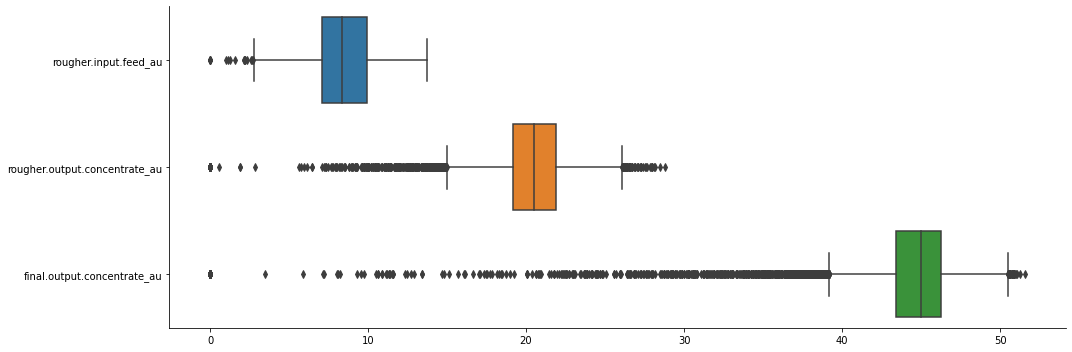

In [25]:
# box and whisker plots for distributions of gold

sns.catplot(kind='box',
            data=au_conc,
            orient='h',
            height=5,
            aspect=3
           )

plt.show()

As expected, the concentration of gold drastically increases throughout the purification process. I guess it's called 'purification' for a reason! 

### Comparing feed particle size distributions across train/test datasets

Before we do any modeling, I need to make sure that the feed particle size distributions are relatively close, or else it could throw off the model training/evaluation.

In [26]:
train_feed_size = recovery_train['rougher.input.feed_size']
test_feed_size = recovery_test['rougher.input.feed_size']

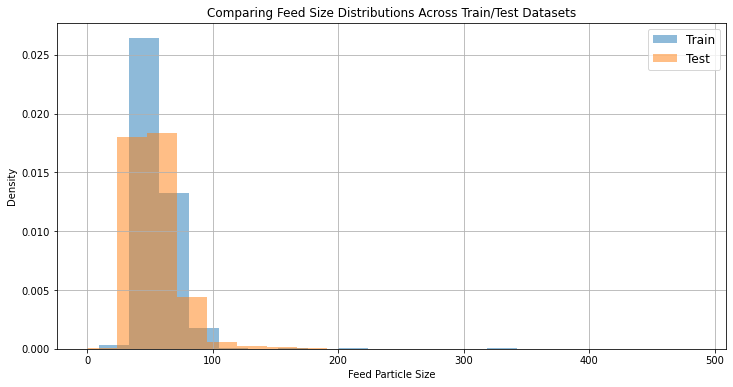

In [27]:
# plotting histogram to see distribution

train_feed_size.hist(figsize=(12, 6),
                     alpha=0.5,
                     label='Train',
                     density=True,
                     bins=20)

test_feed_size.hist(alpha=0.5,
                    label='Test',
                    density=True,
                    bins=20)

plt.title('Comparing Feed Size Distributions Across Train/Test Datasets')
plt.ylabel('Density')
plt.xlabel('Feed Particle Size')
plt.legend(fontsize='large')
plt.show()

In [28]:
print('Mean feed particle size of train data is:', train_feed_size.mean())
print('Mean feed particle size of test data is:', test_feed_size.mean())

Mean feed particle size of train data is: 57.215127655531404
Mean feed particle size of test data is: 56.3386442150923


Okay, great. Distribution of feed sizes across both datasets is very close -- we hopefully will not run into any issues during model development. 

### Comparing Total Concentration

In [29]:
#Create function to get total concentration of all metals at certain stages.

def metal_concen_sum(df, stage):
    metal_handles = ['_ag', '_pb', '_au']
    total_conc = df[stage+metal_handles[0]] + df[stage+metal_handles[1]] + df[stage+metal_handles[2]]
    return total_conc

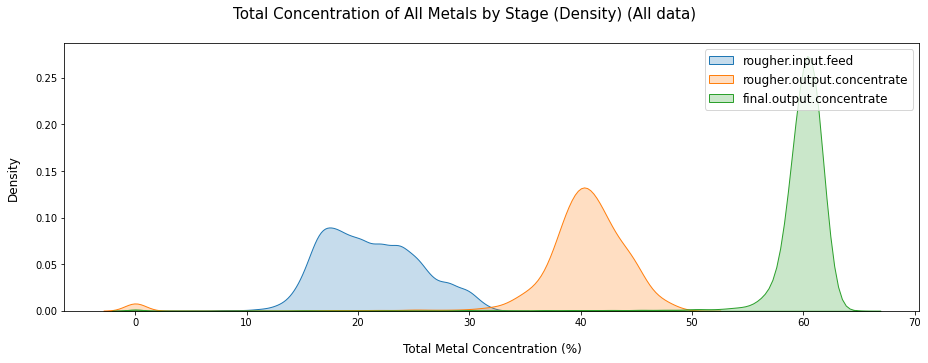

In [30]:
#Create plot to visualize total concentration of all metals at certain stages.
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals by Stage (Density) (All data)', fontsize=15, y=1)

sns.kdeplot(metal_concen_sum(recovery_full, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(metal_concen_sum(recovery_full, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(metal_concen_sum(recovery_full, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Total Metal Concentration (%)', fontsize=12, labelpad = 15)
plt.ylabel('Density', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

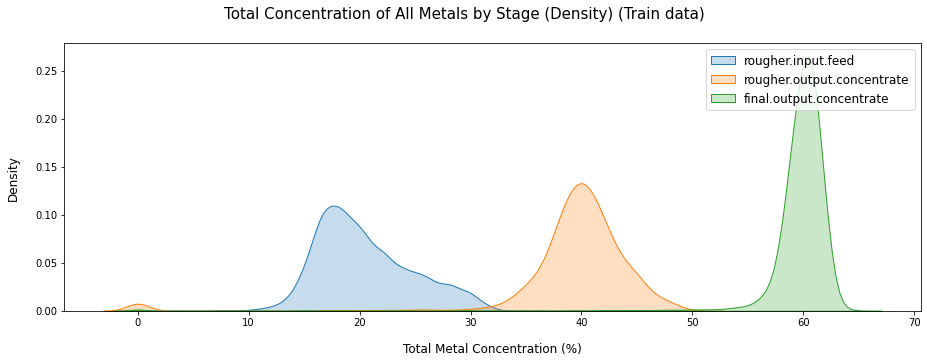

In [31]:
# looking at our training dataset, since this is the set we'd want to trim abnormal values from

fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals by Stage (Density) (Train data)', fontsize=15, y=1)

sns.kdeplot(metal_concen_sum(recovery_train, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(metal_concen_sum(recovery_train, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(metal_concen_sum(recovery_train, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Total Metal Concentration (%)', fontsize=12, labelpad = 15)
plt.ylabel('Density', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

There seems to be a not insignificant amount of concentrations at the 0 level. I do not know enough about the process of gold refining to guess *why* they are there, but perhaps it's best to remove them before we develop and train our models. 

In [32]:
threshold = 0.01

# printing shape to check how many rows we have before and after the removal
print(recovery_train.shape)

recovery_train = recovery_train[recovery_train['rougher.input.feed_au'] +
                                recovery_train['rougher.input.feed_ag'] + 
                                recovery_train['rougher.input.feed_pb'] > threshold]

recovery_train = recovery_train[recovery_train['rougher.output.concentrate_au'] +
                                recovery_train['rougher.output.concentrate_ag'] + 
                                recovery_train['rougher.output.concentrate_pb'] > threshold]
                                
recovery_train = recovery_train[recovery_train['final.output.concentrate_au'] +
                                recovery_train['final.output.concentrate_ag'] + 
                                recovery_train['final.output.concentrate_pb'] > threshold]

print(recovery_train.shape)

(11017, 87)
(10784, 87)


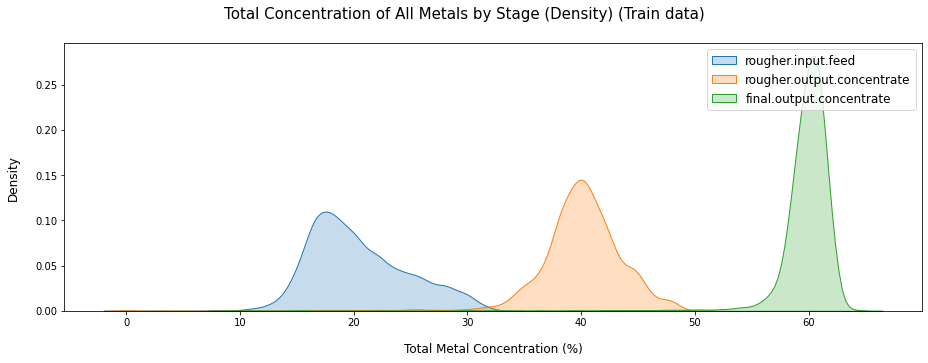

In [33]:
# plotting the same chart again to check how we did

# Create plot to visualize total concentration of all metals at certain stages.
fig = plt.figure(figsize=(13, 5))
fig.suptitle('Total Concentration of All Metals by Stage (Density) (Train data)', fontsize=15, y=1)

sns.kdeplot(metal_concen_sum(recovery_train, 'rougher.input.feed'), label='rougher.input.feed', fill=True)
sns.kdeplot(metal_concen_sum(recovery_train, 'rougher.output.concentrate'), label='rougher.output.concentrate', fill=True)
sns.kdeplot(metal_concen_sum(recovery_train, 'final.output.concentrate'), label='final.output.concentrate', fill=True)
plt.legend(fontsize=12)
plt.xlabel('Total Metal Concentration (%)', fontsize=12, labelpad = 15)
plt.ylabel('Density', fontsize=12, labelpad=15)
    
plt.tight_layout()
plt.show()

There, that looks better to me.

## Building the Model

### Calculation functions

#### Recovery

In [34]:
def calculate_recovery(df, C, F, T):
    recovery = 100 * ((df[C] * (df[F] - df[T])) / (df[F] * (df[C] - df[T])))
    return recovery

#### sMAPE

In [35]:
def calculate_sMAPE(actual, forecast):
    actual = np.array(actual)
    forecast = np.array(forecast)

    numerator = np.abs(actual - forecast)
    denominator = (np.abs(actual) + np.abs(forecast)) / 2

    smape = np.nanmean(numerator / denominator) * 100

    return smape

#### Final sMAPE

In [36]:
def final_sMAPE(actual, forecast):
    actual = actual.values #Convert dataframe to NumPy array
    rougher = calculate_sMAPE(actual[:, 0], forecast[:, 0])
    final = calculate_sMAPE(actual[:, 1], forecast[:, 1])
    return ((0.25 * rougher) + (0.75 * final))

### Preparing Features/Targets

In [37]:
# dropping columns in train dataset that do not exist in test dataset, to avoid target leakage 

column_diff_list = list(column_diff.columns)

# removing the targets, 'final.output.recovery' and 'rougher.output.recovery'
# from the list so they are not removed from the training set

column_diff_list.remove('final.output.recovery')
column_diff_list.remove('rougher.output.recovery')

# looking at the size before dropping columns
print(recovery_train.shape)
recovery_train = recovery_train.drop(column_diff_list, axis=1)


# looking at the size after dropping columns
print(recovery_train.shape)

(10784, 87)
(10784, 55)


In [38]:
print(recovery_test.shape)

(5383, 53)


Now we have the same columns available in the training dataset as we do in the test dataset (except the Training dataset also contains the targets). This should help to avoid target leakage by not utilizing features which are not available at the time of prediction. 

Next I need to split the train and test data into features and targets.

In [39]:
# creating features and target datasets

# training
train_features = recovery_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
train_targets = recovery_train[['rougher.output.recovery', 'final.output.recovery']]

# testing
test_features = recovery_test
test_targets = recovery_test.merge(recovery_full, how='left', on='date')

test_targets = test_targets[['rougher.output.recovery', 'final.output.recovery']]

In [40]:
# removing date

train_features = train_features.drop('date', axis=1)
test_features = test_features.drop('date', axis=1)

In [41]:
train_targets.head()

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016


In [42]:
test_targets.head()

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078


In [43]:
train_features.shape

(10784, 52)

In [44]:
train_targets.shape

(10784, 2)

In [45]:
test_features.shape

(5383, 52)

In [46]:
test_targets.shape

(5383, 2)

### Training the Models

In [47]:
# creating a scorer object to use the final_sMAPE function to score

fsmape = make_scorer(final_sMAPE, greater_is_better=False)

#### Decision Tree Regressor

In [48]:
%%time

# hyperparameters to evaluate 
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

tree = DecisionTreeRegressor()

# GridSearchCV to iterate through models with all hyperparameter combinations with 5 splits of cross-validation
grid_search_tree = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring=fsmape)

grid_search_tree.fit(train_features, train_targets)

print("Best parameters found: ", grid_search_tree.best_params_)
print("Best score found: ", grid_search_tree.best_score_)

Best parameters found:  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score found:  -8.425945913758667
CPU times: user 2min 22s, sys: 0 ns, total: 2min 22s
Wall time: 2min 23s


#### Random Forest Regressor

In [49]:
%%time

param_grid = {
    'n_estimators': [10],
    'max_depth': [3, 7],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3]
}

forest = RandomForestRegressor()

grid_search_forest = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring=fsmape)

grid_search_forest.fit(train_features, train_targets)

print("Best parameters found: ", grid_search_forest.best_params_)
print("Best score found: ", grid_search_forest.best_score_)

Best parameters found:  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Best score found:  -7.79953989485306
CPU times: user 1min 19s, sys: 33 ms, total: 1min 19s
Wall time: 1min 20s


#### Linear Regression

In [50]:
%%time

lr = LinearRegression()

scores = cross_val_score(lr, train_features, train_targets, scoring=fsmape, cv=5)

final_score = scores.sum() / len(scores)

print('Average fSMAPE score:', final_score)

Average fSMAPE score: -8.318571179482662
CPU times: user 246 ms, sys: 177 ms, total: 423 ms
Wall time: 372 ms


### Best Model Testing

It looks like the random forest regressor produced the best fSMAPE score - I will run the test dataset through it for final evaluation.

In [51]:
# evaluating the best model with test data

best_forest = grid_search_forest.best_estimator_
predictions_test = best_forest.predict(test_features)
test_fsmape = final_sMAPE(test_targets, predictions_test)
print("Best Forest Model Final sMAPE: ", test_fsmape)

Best Forest Model Final sMAPE:  9.221246507014897


In [52]:
# comparing the final model with a dummy regressor predicting the mean

dummy = DummyRegressor(strategy='mean')
dummy.fit(train_features, train_targets)

predictions_dummy = dummy.predict(test_features)

dummy_fsmape = final_sMAPE(test_targets, predictions_dummy)
print('Dummy Regressor Baseline sMAPE:', dummy_fsmape)

Dummy Regressor Baseline sMAPE: 8.707115800292188


## Conclusion

After training each model and evaluating it on the test set, the best performing model is the Random Forest Regressor. It finalized in at around a 9% error of predictions after evaluating it with the test data. 

I compared this to a baseline model predicting the mean value, and the baseline model scored better. Perhaps my model is incorrect, or the data I worked with was not sufficient enough to build an accurate model, but we end off with the model being slightly less accurate than just predicting the mean. 

Throughout this project, I was able to take a real dataset, clean and analyze it, split it into features and targets, and train multiple models using the data. Once the models were trained, they were evaluated using the separate test data, and then I was able to draw a conclusion on the most effective model. 